In [1]:
from math import sin,cos,tan,asin,acos,atan,pi,sqrt
import numpy as np
import sympy as sy
from numpy import cross

知识重点
--- 
注意公式1~3 $y=f(x)$, 不是 $y=f_1(t), x=f_2(t)$  
1. $r=\frac{(1+y'^2)^\frac{3}{2}}{|y''|}$  
2. $x_0=x-y'\frac{[1+y'^2]}{y''}$  
3. $y_0=y+\frac{[1+y'^2]}{y''}$
4. $\kappa=\frac{|\vec{a}\times\vec{v}|}{|\vec{v}|^3}$  
  $\kappa=\frac{|\vec{r}''(t)\times\vec{r}'(t)|}{|\vec{r}'(t)|^3}$ （公式原理，老白版本）
5. sympy 叉乘表达形式 a.cross(b)=a×b  
6. $\hat{e}_t=\vec{T}(t)=\frac{\vec{r}'(t)}{|\vec{r}'(t)|}$
7. $\hat{e}_n=\vec{N}(t)=\frac{\vec{T}'(t)}{|\vec{T}'(t)|}$

题目清单
---
1. 469
2. 1161 ⭐⭐ 未复习
3. 1016 ⭐⭐ 未复习
4. 583
5. **396** ⭐⭐  使用公式4
6. **1135** ⭐⭐ 使用公式2+3 或者 $e_n,r$
7. 1154

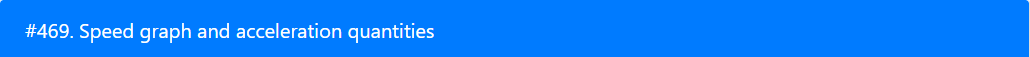

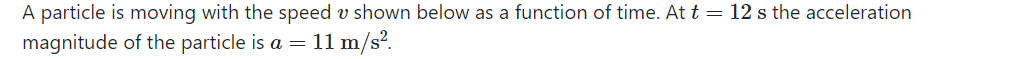

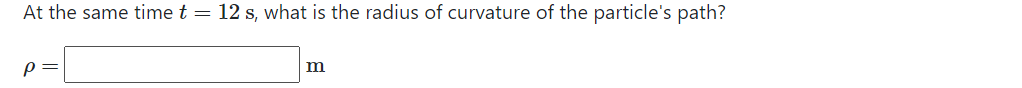

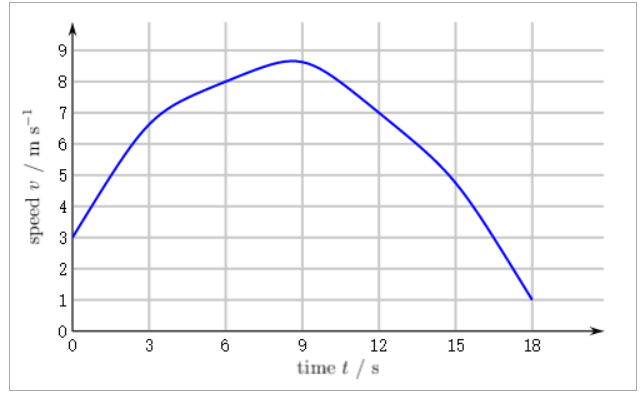

计算曲率圆半径
---
$a_N=\sqrt{a^2-a_T^2}$  
$a_N=\frac{v^2}{r}$  
  
解题思路  
通过图像的斜率 得出 切向加速度$a_T$  
再根据上面两条公式计算

In [5]:
############修改数据
v=4
at=3/2  #看斜率求出切向加速度
a=11
r=21
theta=2 #题目会给出a,r,theta其中一个
############修改数据

#给加速度算半径
an1=sqrt(a**2-at**2) #计算径向加速度
r1=v**2/an1          #计算半径an=v**2/r

#给半径算加速度
an2=v**2/r           #计算径向加速度
a2=sqrt(an2**2+at**2)

#给夹角算半径
a=at/cos(theta)
an3=abs(a*sin(theta))#这里有绝对值
r3=v**2/an3

print(' a→r',r1)
print(' r→a',a2)
print(' ∠→r',r3.evalf())

 a→r 1.46826069677160
 r→a 1.68240865018376
 ∠→r 4.88168057984305


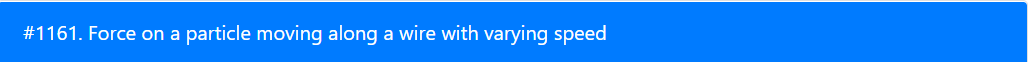

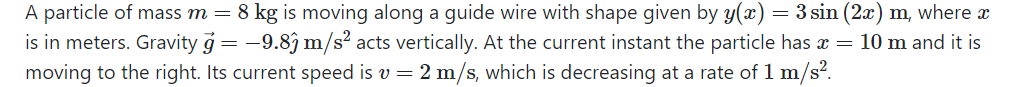

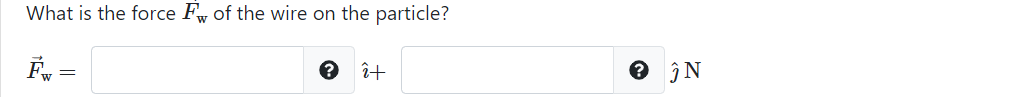

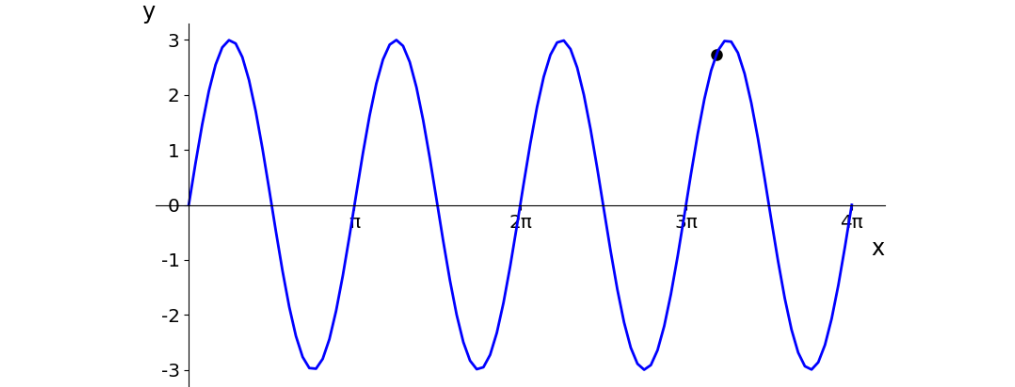

通过加速度求解合外力 F
---
注意 加速/减速+运动方向

In [11]:
#本题考查
    #TNB参考系
import numpy as np
from sympy import *

# d1=int(input('moving_derection='))
# d2=int(input('acceleration_direction='))

x = symbols('x')
####################复制部分
m = 5
y = 2*cos(3*x)
g = -9.8
x_v = 4
vMag = 2
vDotMag = 2

####################复制部分
v=vMag
at_Mag=d1*vDotMag  #跟加速方向有关，减速=-，加速=+！！！！！！！！！！！
direction=d2  #跟运动方向有关，左=-1，右=1   ！！！！！！！！！！！
####################适配程序修改
 
#计算速度方向nv,nan,nat
k=diff(y,x,1).subs(x,x_v) #一阶导确定 vy/vx 的值，此值与运动方向无关
d=diff(y,x,2).subs(x,x_v) #二阶导判断 an 方向是 at逆时针转还是顺时针转
                          #此值与运动方向无关
#判断旋转方向
if d>0:
    d=1
if d<0:
    d=-1
#如果是向左运动的话theta要+180°
turn=0
if direction<0:
    turn = pi

#计算an,at的单位向量
theta=float(atan(k))+turn
nat=np.array([cos(theta),sin(theta)])
nan=np.array([cos(theta+d*pi/2),sin(theta+d*pi/2)])

#计算at向量
at=at_Mag*nat
    
#计算an向量
y1=float(diff(y,x,1).subs(x,x_v))
y2=float(diff(y,x,2).subs(x,x_v))
r=(1+y1**2)**(1.5)/abs(y2) #抄过来的计算公式，目前还没有弄明白
an_Mag=v**2/r
an=an_Mag*nan

#计算和向量
a=an+at

#计算Fx,Fy
fx=a[0]*m
fy=(a[1]-g)*m

print('i',fx)
print('j',fy)

i 10.5386317655485
j 56.1978581295595


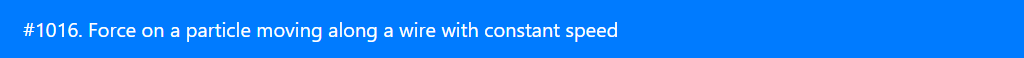

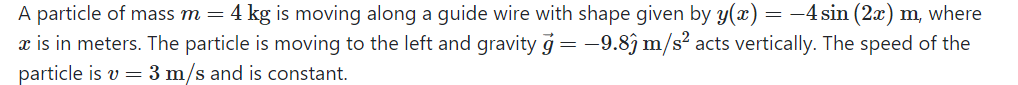

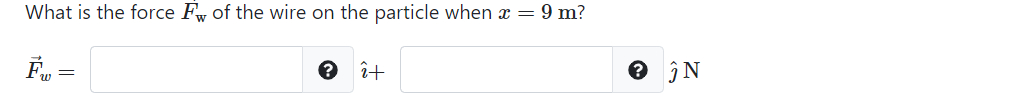

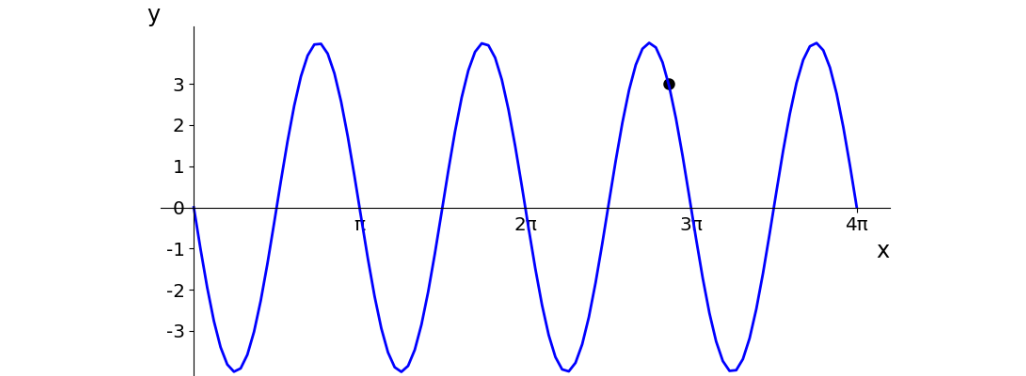

In [13]:
#本题考查
    #TNB参考系
x = symbols('x')
####################复制部分
m = 6
y = cos(3*x)
g = -9.8
x_v = 3
vMag = 4
vDot = 2

####################复制部分    
#计算速度方向nv,nan,nat
#注意，因为这道题 at=0，所以无论是向左还是向右运动，都不影响改程序计算
#right→k=k, d=d
#left →k=-k d=d 
k=diff(y,x,1).subs(x,x_v) #一阶导确定 vy/vx 的值，此值与运动方向无关
d=diff(y,x,2).subs(x,x_v) #二阶导判断 an 方向是 at逆时针转还是顺时针转

#判断旋转方向
if d>0:
    d=1
if d<0:
    d=-1

#计算an,at的单位向量
theta=float(atan(k))
nat=np.array([cos(theta),sin(theta)])
nan=np.array([cos(theta+d*pi/2),sin(theta+d*pi/2)])

print('nat',nat)
print('nan',nan)

#计算at因为是恒定速度，所以at=0
at=0*nat
    
#计算an向量
y1=float(diff(y,x,1).subs(x,x_v))
y2=float(diff(y,x,2).subs(x,x_v))
r=(1+y1**2)**(1.5)/abs(y2) #抄过来的计算公式，目前还没有弄明白
an=v**2/r
an=an*nan

#计算和向量
a=an+at

#计算Fx,Fy
fx=a[0]*m
fy=(a[1]-g)*m

print('a',a)
print('i',fx)
print('j',fy)

nat [0.628871764881017 -0.777509037462225]
nan [0.777509037462225 0.628871764881017]
a [6.34270782892740 5.13016527694832]
i 38.0562469735644
j 89.5809916616899


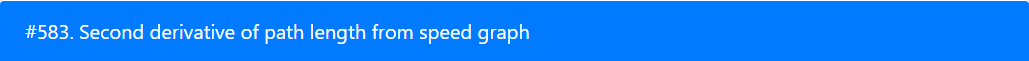

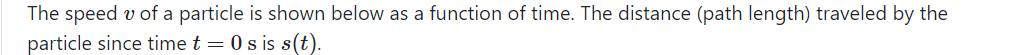

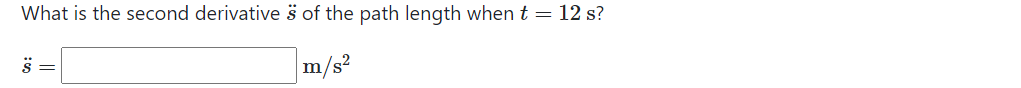

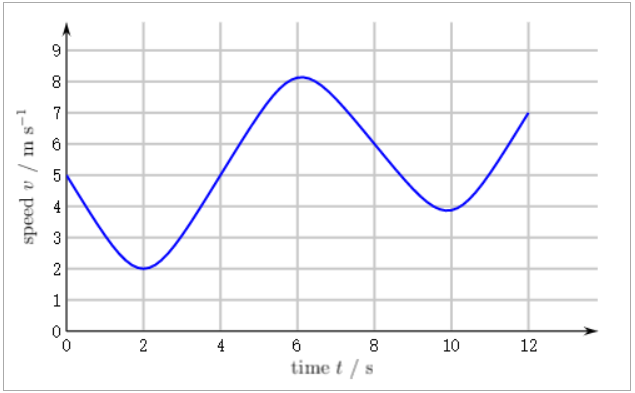

$\ddot{s}=a$ 加速度   
直接看斜率就行了

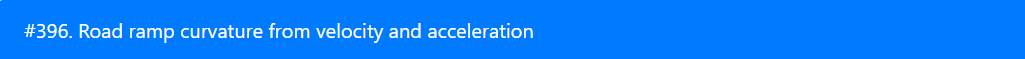

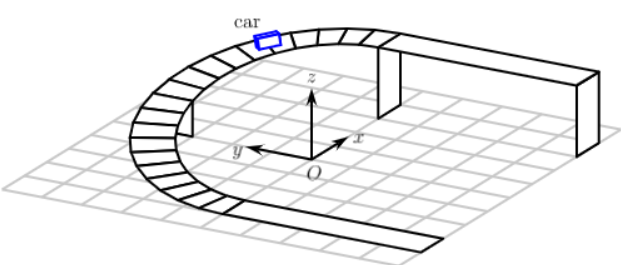


$\vec{v}=\dot{r}\hat{e}_r+r\dot{\theta}\hat{r}_\theta$


$\vec{a}=(\ddot{r}-r\dot{\theta}^2)\hat{e}_r+(r\ddot{\theta}+2\dot{r}\dot{\theta})\hat{e}_\theta$<


**本题柱坐标基底表示方式**  
$v=(\hat{e}_r,\hat{e}_\theta,k)$  
$a=(\hat{e}_r,\hat{e}_\theta,k)$  
$\kappa=\frac{|\vec{a}\times\vec{v}|}{|\vec{v}|^3}$

In [3]:
#############################复制部分
from sympy import *
import numpy as np
v = Matrix([0,108,6]) # in polar basis
a = Matrix([-324,36,-20]) # in polar basis
#############################复制部分
def convert(x):
    ans=np.array([0,0,0])
    for i in range(3):
        ans[i]=float(x[i])
    return ans

v=convert(v)
a=convert(a)

k=np.linalg.norm(cross(a,v))/np.linalg.norm(v)**3
1/k

NameError: name 'cross' is not defined

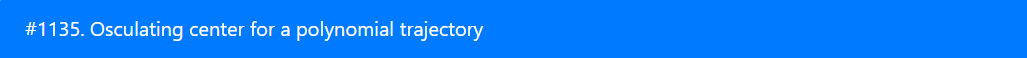

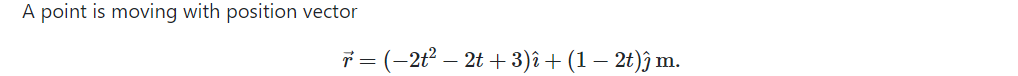

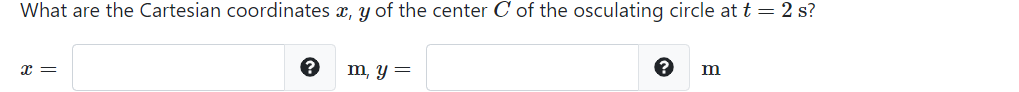

计算曲率圆圆心
---
曲率圆圆心坐标公式  
  
注意以下公式 $y=f(x)$, 不是 $y=f_1(t), x=f_2(t)$  
  
  
$x_0=x-\frac{y'[1+y'^2]}{y''}$  
$y_0=y+\frac{[1+y'^2]}{y''}$

方法1 套公式
---

In [6]:
######################复制部分
t = symbols('t', real = True)
r = Matrix([-t - 1, -2*t**2 - t - 3, 0])
t_v = 2
######################计算过程

x=r[0]
y=r[1]

x0=x.subs(t,t_v)
y0=y.subs(t,t_v)

y1=diff(y,t)/diff(x,t) #参数方程求导：dy/dx=dy/dt*dt/dx
y2=diff(y1,t)/diff(x,t) #二阶导: d/dt(dy/dx)*dt/dx

xc=float((x0-y1*(1+y1**2)/y2).subs(t,t_v)) 
yc=float((y0+(1+y1**2)/y2).subs(t,t_v))
xc,yc

(181.5, -33.5)

方法2 利用 $e_n$ 和 $r$ 的公式计算
---

In [7]:
######################复制部分
t = symbols('t', real = True)
r = Matrix([-t - 1, -2*t**2 - t - 3, 0])
t_v = 2
######################计算过程

def MO(x):
    return (x[0]**2+x[1]**2+x[2]**2)**0.5

#计算曲率半径
v=diff(r,t,1).subs(t,t_v)
a=diff(r,t,2).subs(t,t_v)
radius=(MO(a.cross(v))/MO(v)**3)**-1

#计算en方向
T=diff(r,t,1)/MO(diff(r,t,1))
N=diff(T,t,1)/MO(diff(T,t,1))


N=N.subs(t,t_v)
(r.subs(t,t_v)+N*radius).T

Matrix([[181.5, -33.5000000000002, 0]])

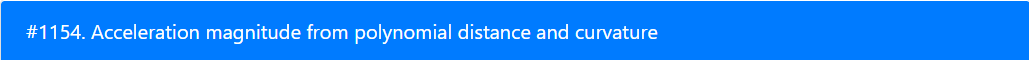

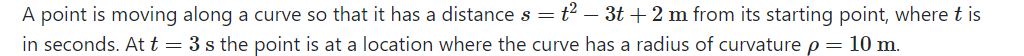

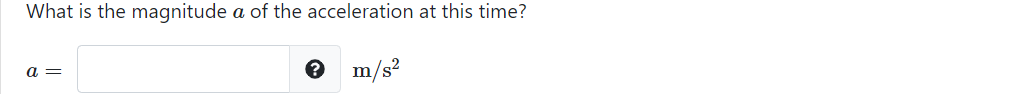

$v=\frac{ds}{dt}$  

$a_T=\frac{dv}{dt}$

$a_N=\frac{v^2}{r}$

In [8]:
######################复制部分
t = symbols('t', real = True)
s = -t**2 + 3*t + 1
t_v = 1
rho = 2
######################计算过程
v=diff(s,t,1)
at=diff(s,t,2)
an=v**2/rho

a=(at**2+an**2)**0.5
a.subs(t,t_v)

2.06155281280883